In [1]:
%load_ext autoreload
%autoreload 2


## Data paths

In [2]:
DATA_PATH = r"D:\datasets_complete\datasets-projects\online+retail+ii\online_retail_II.xlsx"


# Data Variable Information
**InvoiceNo**: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

**StockCode**: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.

**Description**: Product (item) name. Nominal.

**Quantity**: The quantities of each product (item) per transaction. Numeric.

**InvoiceDate**: Invice date and time. Numeric. The day and time when a transaction was generated.

**UnitPrice**: Unit price. Numeric. Product price per unit in sterling (£).

*CustomerID*: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.

**Country**: Country name. Nominal. The name of the country where a customer resides.

[Link to info](https://archive.ics.uci.edu/dataset/502/online+retail+ii)

# Pipeline logic

In [3]:
    # # 1. Normalize column names
    # df = normalize_column_names(df)

    # # 2. Column 'invoice' to string
    # df = df_column_to_string(df, "invoice", show_head=False)

    # # 3 Filter out rows where 'invoice' starts with 'C'
    # df_cancellation_invoices = filter_rows_starting_with(df, "invoice", "C")

    # # 4. Remove and display unique prefixes in 'invoice' column
    # remove_and_display_unique_prefixes(df, "invoice")

    # # 5 Column 'stockcode' to string
    # df_column_to_string(df, 'stockcode')

    # # 6. Remove abnormal codes
    # stockcodes_abnormal, count_abnormal = get_abnormal_values(df, 'stockcode', print_list=True)

    # # 7 Filter out abnormal invoices ( exclude NOT 6 consecutive digits)
    # df, mask, entries_dropped = filter_consecutive_digits(df, 'invoice', 6) 
    # print("Entries dropped:", entries_dropped)

    # # 8 Drop abnormal stockcodes by list
    # df = exclude_values_by_list(df, "stockcode", stockcodes_abnormal)

    # # 9. Drop NA, duplicates, zero price
    # df = drop_na_duplicates_and_zeroes(df)


# Imports

In [4]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import sys
import os
sys.path.append(os.path.abspath(".."))
from src.functions import *
from src.pipeline import *


## Data read and dataframe creation (`PANDAS`)

In [12]:
# Enable the following lines to load data from excel files.
# df = pd.read_excel(DATA_PATH, sheet_name="Year 2010-2011")
# df_b = pd.read_excel(DATA_PATH, sheet_name="Year 2009-2010")


In [13]:
# Enable the following lines to save the dataframes as pickle files.
# Saved to avoid re-loading the excel file.
# df.to_pickle('df_2010-2011.pkl')
# df_b.to_pickle('df_2009-2010.pkl')


In [14]:
# Load the pre-saved pickle file
df_a_raw = pd.read_pickle('df_2010-2011.pkl')
# df_b_raw = pd.read_pickle('df_2009-2010.pkl') # Enable to access with dataframe b
display(df_a_raw.head())
# display(df_b_raw.head())


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [15]:
# 'df_a_raw' is the raw input data
df_ready_a = cleaning_pipeline(df_a_raw)
# Verify the final result
print("\nFinal Cleaned DataFrame Info:")
display(df_ready_a.info()) # This dataframe is ready for analysis
# df_ready_a.to_pickle('df_cleaned_2010-2011.pkl') # Save cleaned dataframe


'invoice' converted to string type.
object
Filtered rows where 'invoice' starts with 'C'
     invoice stockcode                       description  quantity  \
141  C536379         D                          Discount        -1   
154  C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235  C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236  C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237  C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            invoicedate  price  customer_id         country  
141 2010-12-01 09:41:00  27.50      14527.0  United Kingdom  
154 2010-12-01 09:49:00   4.65      15311.0  United Kingdom  
235 2010-12-01 10:24:00   1.65      17548.0  United Kingdom  
236 2010-12-01 10:24:00   0.29      17548.0  United Kingdom  
237 2010-12-01 10:24:00   0.29      17548.0  United Kingdom  
Results for prefix: 'C'


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


Results for prefix: 'A'


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


'stockcode' converted to string type.
object
33 abnormal values:
['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE', 'DCGS0076', 'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm', 'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'DCGS0055', 'DCGS0072', 'DCGS0074', 'DCGS0069', 'DCGS0057', 'DCGSSBOY', 'DCGSSGIRL', 'gift_0001_10', 'PADS', 'DCGS0004', 'DCGS0073', 'DCGS0071', 'DCGS0066P', 'DCGS0068', 'DCGS0067', 'B', 'CRUK']
Entries dropped: 9291
Removed 2409 rows where 'stockcode' was in the exclusion list.
Number of duplicated rows: 5187
Duplicated rows (sorted):


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom


Duplicates dropped.
Rows with price equal to 0:


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1510,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1985,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1986,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
2022,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


Rows with price equal to 0 removed.

Final Cleaned DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 391150 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoice      391150 non-null  object        
 1   stockcode    391150 non-null  object        
 2   description  391150 non-null  object        
 3   quantity     391150 non-null  int64         
 4   invoicedate  391150 non-null  datetime64[ns]
 5   price        391150 non-null  float64       
 6   customer_id  391150 non-null  float64       
 7   country      391150 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 26.9+ MB


None

In [16]:
# df_b = df_b_raw.copy()


# # 'df_b' is the raw input data
# df_ready_b = cleaning_pipeline(df_b)

# # Verify the final result
# print("\nFinal Cleaned DataFrame Info:")
# display(df_ready_b.info()) # This dataframe is ready for analysis
# # df_ready_b.to_pickle('df_cleaned_2009-2010.pkl') # Save cleaned dataframe


# EDA

This EDA is automated in cells 25 and 26, with df_ready_a & df_ready_b respectively. For transparency the process of how cleaning was implemented you can explore these following cells.

In [17]:
display(df_a_raw.describe())
display(df_a_raw.describe(include=['O'])) # Includes object type columns


,Quantity,InvoiceDate,Price,Customer ID
count,541910.000000,541910,541910.000000,406830.000000
mean,9.552234,2011-07-04 13:35:22.342307584,4.611138,15287.684160
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.080957,NaN,96.759765,1713.603074


,Invoice,StockCode,Description,Country
count,541910,541910,540456,541910
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [18]:
# Usage
df = normalize_column_names(df_a_raw) # Implement normalize_column_names function

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoice      541910 non-null  object        
 1   stockcode    541910 non-null  object        
 2   description  540456 non-null  object        
 3   quantity     541910 non-null  int64         
 4   invoicedate  541910 non-null  datetime64[ns]
 5   price        541910 non-null  float64       
 6   customer_id  406830 non-null  float64       
 7   country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [19]:
df_column_names = df.columns.to_list()
# df_column_names


# EDA Notes

Client Clustering

- `541910` entries, `Description` and `Customer ID` do not match the number of entries (missing values).
- Negative values in `Quantity`: `-80995.000000`. It matches the **max** amount.
- Negative values in `Price`: `-11062.060000`.
- `25900` unique `Invoice` values.
- `4070` unique `StockCode` values, meaning 4070 products; but `4223` `Description` values.

### `invoice` column

In [20]:
# df[df['quantity']<0].head() # Overview of `quantity` negative values 


In [21]:
# df['invoice'] = df['invoice'].astype('str')
df = df_column_to_string(df, 'invoice') # Using the function to convert 'invoice' column to string type.

df_cancellation_invoices = filter_rows_starting_with(df, 'invoice', 'C')
# df[df['invoice'].str.match("^\\d{6}$") == False] # Regex for NOT 6 consecutive numbers as invoice id

print("Invoices that are cancellations:", df_cancellation_invoices.shape[0]) # According to the data information website


'invoice' converted to string type.
object
Filtered rows where 'invoice' starts with 'C'
     invoice stockcode                       description  quantity  \
141  C536379         D                          Discount        -1   
154  C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235  C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236  C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237  C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            invoicedate  price  customer_id         country  
141 2010-12-01 09:41:00  27.50      14527.0  United Kingdom  
154 2010-12-01 09:49:00   4.65      15311.0  United Kingdom  
235 2010-12-01 10:24:00   1.65      17548.0  United Kingdom  
236 2010-12-01 10:24:00   0.29      17548.0  United Kingdom  
237 2010-12-01 10:24:00   0.29      17548.0  United Kingdom  
Invoices that are cancellations: 9288


In [22]:
# Other letters in 'invoice' column
# df['invoice'].str.replace("[0-9]", "", regex=True).unique()
remove_and_display_unique_prefixes(df, 'invoice')

# Output: There are invoices that start with 'C' and 'A' letters.


Results for prefix: 'C'


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


Results for prefix: 'A'


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


## `stockcode` column

In [23]:
df_column_to_string(df, 'stockcode')


'stockcode' converted to string type.
object


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [24]:
# stockcodes_abnormal = df[(df['stockcode'].str.match("^\\d{5}$") == False) & (df['stockcode'].str.match("^\\d{5}[a-zA-Z]+$") == False)]['stockcode'].unique()
# Regex for NOT 5 consecutive numbers or 5 consecutive numbers followed by letters in the values of 'stockcode' column
stockcodes_abnormal, count_abnormal = get_abnormal_values(df, 'stockcode', print_list=True)

# Output: There are some abnormal stockcodes
# print("Abnormal Stockcodes:", stockcodes_abnormal)


33 abnormal values:
['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE', 'DCGS0076', 'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm', 'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'DCGS0055', 'DCGS0072', 'DCGS0074', 'DCGS0069', 'DCGS0057', 'DCGSSBOY', 'DCGSSGIRL', 'gift_0001_10', 'PADS', 'DCGS0004', 'DCGS0073', 'DCGS0071', 'DCGS0066P', 'DCGS0068', 'DCGS0067', 'B', 'CRUK']


In [25]:
# Show entries witch each abnormal stockcode in stockcodes_abnormal
# display_rows_by_list(df, 'stockcode', stockcodes_abnormal)


**`stockcode` code** | **Description** | **Implementation**
----------|----------|----------
`POST` | Postage charge. Delivery fees? | Exlcude
`D` | Discount applied | Exclude
`C2` | Shipping fee | Exclude
`DOT` | Dotcom purchase | Exclude
`M` | Manual purchase entrie | Exclude
`BANK CHARGES` | Bank fees? | Exclude
`S` | Sample product | Exclude
`AMAZONFEE` | Amazon marketplace fee | Exclude
`DCGS0076` | Gift voucher code 76 | Exclude
`DCGS0003` | Gift voucher code 3 | Exclude
`gift_0001_40` | £40 gift card | Exclude
`DCGS0070` | Gift voucher code 70 | Exclude
`m` | Manual adjustment (lowercase) | Exclude
`gift_0001_50` | £50 gift card | Exclude
`gift_0001_30` | £30 gift card | Exclude
`gift_0001_20` | £20 gift card | Exclude
`DCGS0055` | Gift voucher code 55 | Exclude
`DCGS0072` | Gift voucher code 72 | Exclude
`DCGS0074` | Gift voucher code 74 | Exclude
`DCGS0069` | Gift voucher code 69 | Exclude
`DCGS0057` | Gift voucher code 57 | Exclude
`DCGSSBOY` | Boy's gift voucher | Exclude
`DCGSSGIRL` | Girl's gift voucher | Exclude
`gift_0001_10` | £10 gift card | Exclude
`PADS` | Padding/packaging materials | Exclude Non-sale item
`DCGS0004` | Gift voucher code 4 | Exclude
`DCGS0073` | Gift voucher code 73 | Exclude
`DCGS0071` | Gift voucher code 71 | Exclude
`DCGS0066P` | Gift voucher code 66P | Exclude
`DCGS0068` | Gift voucher code 68 | Exclude
`DCGS0067` | Gift voucher code 67 | Exclude
`B` | Bad debt write-off | Exclude
`CRUK` | Cancer Research UK donation | Exclude

# Data Cleaning

In [26]:
# Copy df to df_clean for cleaning operations
df_clean = df.copy()


In [27]:
original_count = len(df_clean)


### `invoice` Filter out invoice codes that do not match "6 digits". Cancelations are not important for this analysis.

In [28]:
df_column_to_string(df_clean, 'invoice')
df_clean, mask, entries_dropped = filter_consecutive_digits(df_clean, 'invoice', 6) # Six consecutive digits as a rule for invoice IDs
print("Entries dropped:", entries_dropped)
df_clean.describe()


'invoice' is string!
Entries dropped: 9291


,quantity,invoicedate,price,customer_id
count,532619.000000,532619,532619.000000,397925.000000
mean,10.240006,2011-07-04 17:06:17.472038400,3.868438,15294.308601
min,-9600.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,1.000000,2011-03-28 12:13:00,1.250000,13969.000000
50%,3.000000,2011-07-20 11:54:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:21:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,159.593850,NaN,32.470417,1713.172738


### `stockcodes` filter out

In [29]:
df_clean = exclude_values_by_list(df_clean, 'stockcode', stockcodes_abnormal)
df_clean.describe()
# Change in abnormal quantity values after removing abnormal stockcodes.


Removed 2409 rows where 'stockcode' was in the exclusion list.


,quantity,invoicedate,price,customer_id
count,530210.000000,530210,530210.000000,396370.000000
mean,10.256544,2011-07-04 18:23:18.884932096,3.250016,15301.602071
min,-9600.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,1.000000,2011-03-28 12:13:00,1.250000,13975.000000
50%,3.000000,2011-07-20 12:05:00,2.080000,15159.000000
75%,11.000000,2011-10-19 12:35:00,4.130000,16803.000000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000
std,159.899809,NaN,4.373334,1709.982593


In [30]:
# Check if any abnormal stockcode remains
# for code in stockcodes_abnormal:
#     display(df_clean[df_clean['stockcode'] == code].head(10)) 
# Output: No abnormal stockcodes remain.


1. Drop abnormal 'stockcodes'.
2. Filter out invoice codes that do not match "6 consecutive digits".
3. Filter out NaN and Nulls from 'customer_id'.
4. Erase duplicate entries.
5. Drop entries where'price' equals 0.

In [31]:
# def drop_na_duplicates_and_zeroes(df, col_customer='customer_id', col_price='price')
df_clean = drop_na_duplicates_and_zeroes(df_clean)
df_clean.describe()


Number of duplicated rows: 5187
Duplicated rows (sorted):


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom


Duplicates dropped.
Rows with price equal to 0:


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1510,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1985,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1986,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
2022,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


Rows with price equal to 0 removed.


,quantity,invoicedate,price,customer_id
count,391150.000000,391150,391150.000000,391150.000000
mean,13.145300,2011-07-10 19:37:34.766713600,2.874372,15295.171456
min,1.000000,2010-12-01 08:26:00,0.040000,12346.000000
25%,2.000000,2011-04-07 11:16:00,1.250000,13969.000000
50%,6.000000,2011-07-31 12:05:00,1.950000,15159.000000
75%,12.000000,2011-10-20 12:57:00,3.750000,16794.000000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000
std,180.807831,NaN,4.284738,1710.339033


In [32]:
len(df_clean)/len(df)


0.7217988226827333

## Notes of cleaning process

- Dropped 28% of data

# Feature Engineering

### Strategy

- Total per sale is missing. Added as `sale_total`
- Country feature encoded
- Create profiles based on `customer_id`. Added as new dataframe
- Data confusion matrix to understand better correlation

### Clean up and re import

In [33]:
# print(list(globals().keys()))


In [34]:
%reset out # Cleans outputs


Flushing output cache (5 entries)
Don't know how to reset  #, please run `%reset?` for details
Don't know how to reset  cleans, please run `%reset?` for details
Don't know how to reset  outputs, please run `%reset?` for details


In [35]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler


In [36]:
import sys
import os
sys.path.append(os.path.abspath(".."))
from src import functions
from src import pipeline
from src import k_means_function


In [37]:
# print(list(globals().keys()))


In [38]:
df_fe = df_ready_a.copy() # Copy dataframe from cell 25 (pipeline output)
df_fe.info()


<class 'pandas.core.frame.DataFrame'>
Index: 391150 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoice      391150 non-null  object        
 1   stockcode    391150 non-null  object        
 2   description  391150 non-null  object        
 3   quantity     391150 non-null  int64         
 4   invoicedate  391150 non-null  datetime64[ns]
 5   price        391150 non-null  float64       
 6   customer_id  391150 non-null  float64       
 7   country      391150 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 26.9+ MB


### Feature: `country`

In [39]:
# Encode country column One-Hot Encoding. Categorical non-ordinal variable. Encode the categories based on their frequency to avoid curse of dimensionality.

# Get unique object values in 'country' column
# print(df_fe['country'].unique().tolist())
# Count of total countries
# len(df_fe['country'].unique()) # 37 countries present


In [40]:
# Ensure 'country' column is of type string
# df_fe = df_column_to_string(df_fe, 'country') # Output: 'country' is string! 
df_fe, country_map = mean_encoder(df_fe, 'country', True) # Save country map for later

df_fe.head()


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country_encoded
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,0.891914
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,0.891914
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,0.891914
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,0.891914
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,0.891914


### Feature  `customer_id`

In [41]:
# To int
df_fe['customer_id'] = df_fe['customer_id'].astype(int)
df_fe.info()


<class 'pandas.core.frame.DataFrame'>
Index: 391150 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   invoice          391150 non-null  object        
 1   stockcode        391150 non-null  object        
 2   description      391150 non-null  object        
 3   quantity         391150 non-null  int64         
 4   invoicedate      391150 non-null  datetime64[ns]
 5   price            391150 non-null  float64       
 6   customer_id      391150 non-null  int64         
 7   country_encoded  391150 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 26.9+ MB


### Features RFM

In [42]:
df_fe['sale_total'] = df_fe['quantity'] * df_fe['price'] # Creates new column 'sale_total' that is the product of 'quantity' and 'price' columns
display(df_fe.head())
display(df_fe.describe(include=['O']))
display(df_fe.describe())


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country_encoded,sale_total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,0.891914,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,0.891914,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,0.891914,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,0.891914,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,0.891914,20.34


,invoice,stockcode,description
count,391150,391150,391150
unique,18402,3659,3871
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER
freq,541,2023,2016


,quantity,invoicedate,price,customer_id,country_encoded,sale_total
count,391150.000000,391150,391150.000000,391150.000000,391150.000000,391150.000000
mean,13.145300,2011-07-10 19:37:34.766713600,2.874372,15295.171456,0.796918,22.337281
min,1.000000,2010-12-01 08:26:00,0.040000,12346.000000,0.000023,0.060000
25%,2.000000,2011-04-07 11:16:00,1.250000,13969.000000,0.891914,4.950000
50%,6.000000,2011-07-31 12:05:00,1.950000,15159.000000,0.891914,11.900000
75%,12.000000,2011-10-20 12:57:00,3.750000,16794.000000,0.891914,19.800000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000,0.891914,168469.600000
std,180.807831,NaN,4.284738,1710.339033,0.272901,310.932442


In [43]:
df_rfm = df_fe.groupby(by='customer_id', as_index=False).agg(
    sale_value=('sale_total','sum'), # Total sales value per customer "M"
    frequency=('invoice','nunique'), # Number of unique invoices per customer (how many times has this client purchased) "F"
    last_invoice_date=('invoicedate','max') # Last invoice date per customer
)

df_rfm.head()


,customer_id,sale_value,frequency,last_invoice_date
0,12346,77183.60,1,2011-01-18 10:01:00
1,12347,4310.00,7,2011-12-07 15:52:00
2,12348,1437.24,4,2011-09-25 13:13:00
3,12349,1457.55,1,2011-11-21 09:51:00
4,12350,294.40,1,2011-02-02 16:01:00


In [44]:
max_date = df_rfm['last_invoice_date'].max() # Whats the latest date in record to calculate recency

df_rfm['recency_days'] = (max_date - df_rfm['last_invoice_date']).dt.days # Agregate recency in days "R"

df_rfm.drop(columns=['last_invoice_date'], inplace=True)
# print(df_rfm.head())
print(df_rfm.describe())
print(df_rfm.info())


        customer_id     sale_value    frequency  recency_days
count   4334.000000    4334.000000  4334.000000   4334.000000
mean   15299.251731    2015.973152     4.245962     91.703046
std     1721.994109    8903.673825     7.634989    100.177047
min    12346.000000       3.750000     1.000000      0.000000
25%    13812.250000     304.240000     1.000000     17.000000
50%    15297.500000     662.565000     2.000000     50.000000
75%    16778.750000    1631.622500     5.000000    142.000000
max    18287.000000  279138.020000   206.000000    373.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4334 entries, 0 to 4333
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   4334 non-null   int64  
 1   sale_value    4334 non-null   float64
 2   frequency     4334 non-null   int64  
 3   recency_days  4334 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 135.6 KB
None


### RFM Outlier detection

Text(0.5, 1.0, 'Sales Value Distribution')

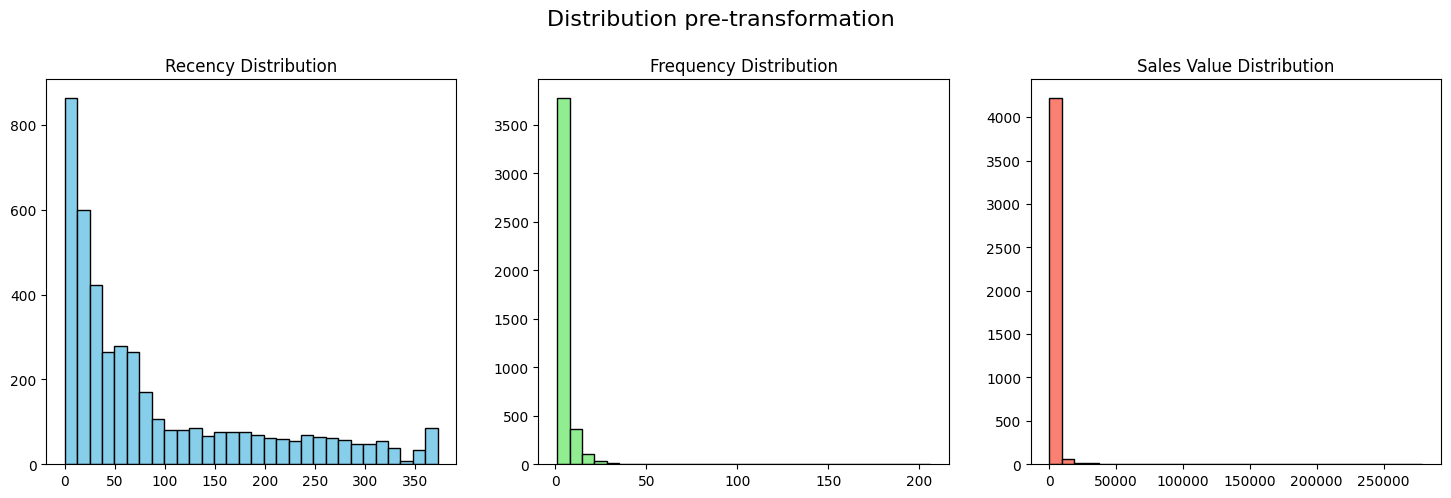

In [45]:
# Graph distributions of RFM features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Distribution pre-transformation', fontsize=16, y=1.02)
axes[0].hist(df_rfm['recency_days'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Recency Distribution')
axes[1].hist(df_rfm['frequency'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Frequency Distribution')
axes[2].hist(df_rfm['sale_value'], bins=30, color='salmon', edgecolor='black')
axes[2].set_title('Sales Value Distribution')
# Several skewness detected in frequency and sales (monetary value)


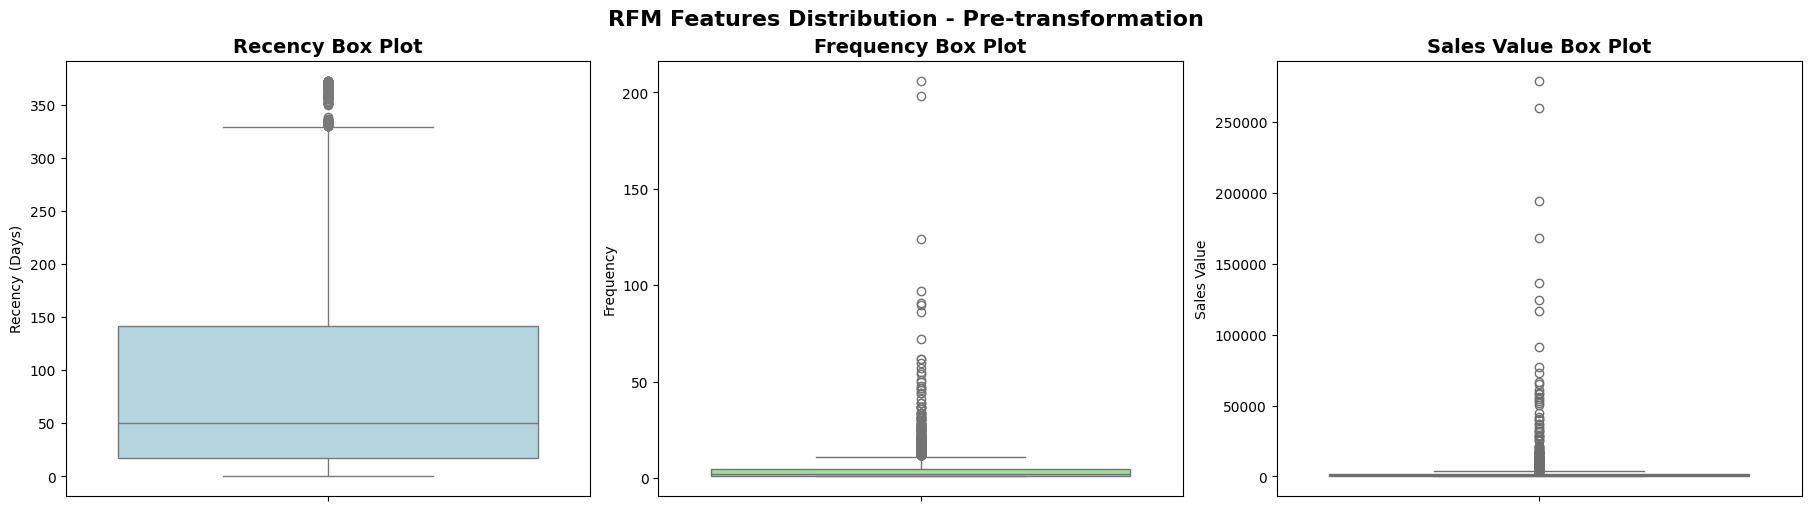

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)

# Recency box plot
sns.boxplot(y=df_rfm['recency_days'], ax=axes[0], color='lightblue')
axes[0].set_title('Recency Box Plot', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Recency (Days)')

# Frequency box plot
sns.boxplot(y=df_rfm['frequency'], ax=axes[1], color='lightgreen')
axes[1].set_title('Frequency Box Plot', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Frequency')

# Sales value box plot
sns.boxplot(y=df_rfm['sale_value'], ax=axes[2], color='lightcoral')
axes[2].set_title('Sales Value Box Plot', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Sales Value')

plt.suptitle('RFM Features Distribution - Pre-transformation', fontsize=16, fontweight='bold')
plt.show()


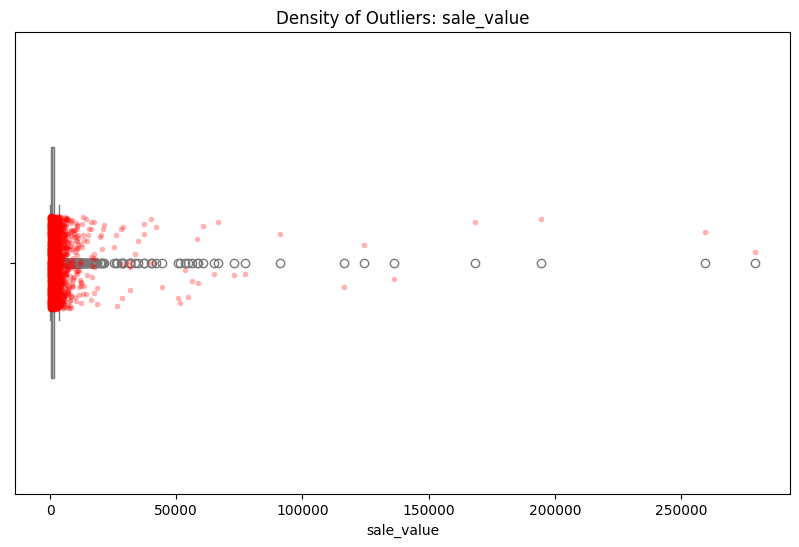

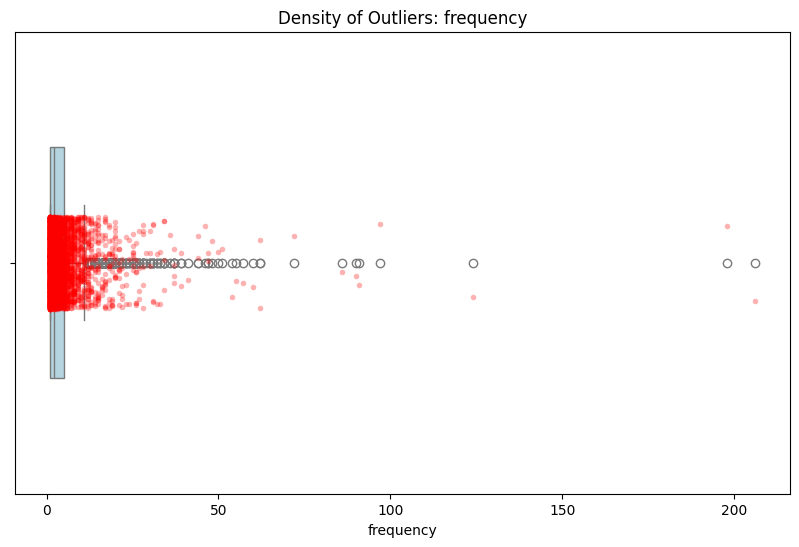

In [47]:
# Density of outliers dataframe df_rfm
plot_outlier_density(df_rfm, 'sale_value')
plot_outlier_density(df_rfm, 'frequency')


### Outlier treatment

#### **OPTION A** Logaritmic transformation

In [48]:
columns_to_transform =['frequency', 'sale_value']
df_test_log = log_transform_column(df_rfm, columns_to_transform, True)
# print(df_test_log.info())
df_test_log.describe()


,customer_id,recency_days,frequency_log,sale_value_log
count,4334.000000,4334.000000,4334.000000,4334.000000
mean,15299.251731,91.703046,1.341639,6.575495
std,1721.994109,100.177047,0.681783,1.255017
min,12346.000000,0.000000,0.693147,1.558145
25%,13812.250000,17.000000,0.693147,5.721098
50%,15297.500000,50.000000,1.098612,6.497626
75%,16778.750000,142.000000,1.791759,7.397943
max,18287.000000,373.000000,5.332719,12.539465


Text(0.5, 1.0, 'Sales Value Distribution')

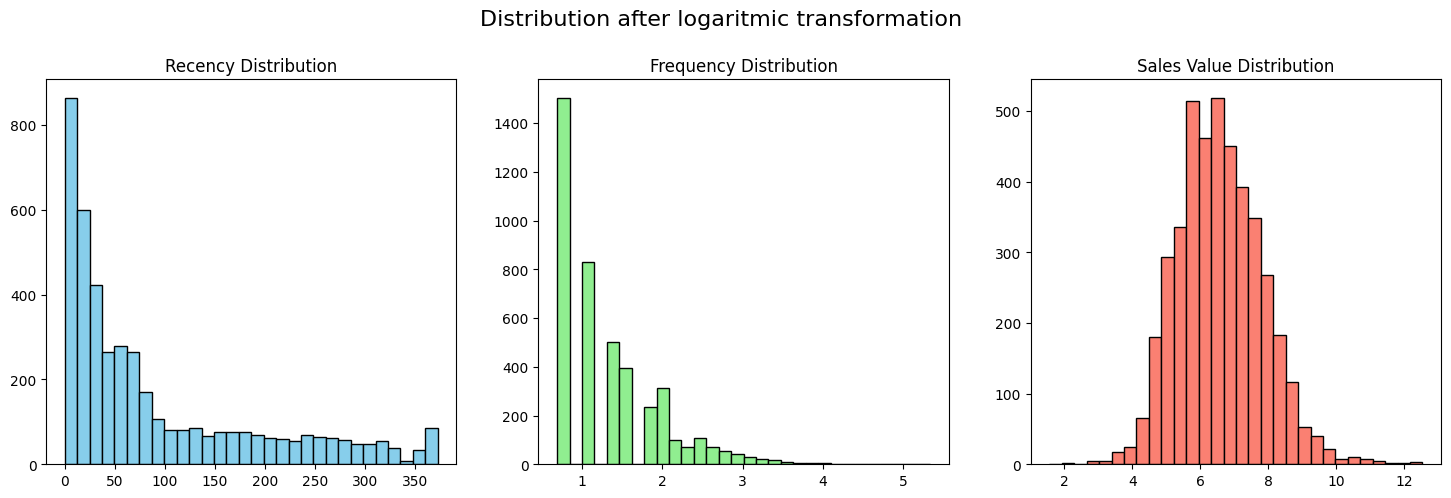

In [49]:
# Graph distributions of RFM features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Distribution after logaritmic transformation', fontsize=16, y=1.02)
axes[0].hist(df_test_log['recency_days'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Recency Distribution')
axes[1].hist(df_test_log['frequency_log'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Frequency Distribution')
axes[2].hist(df_test_log['sale_value_log'], bins=30, color='salmon', edgecolor='black')
axes[2].set_title('Sales Value Distribution')


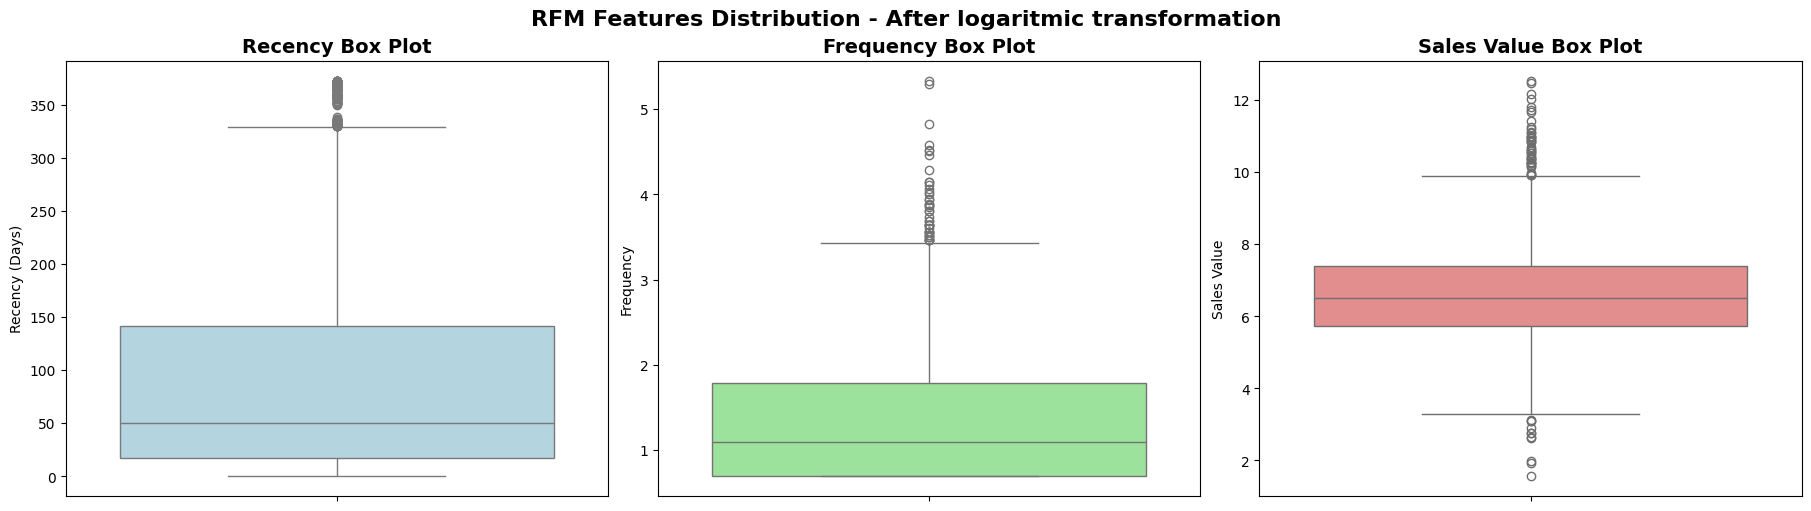

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)

# Recency box plot
sns.boxplot(y=df_test_log['recency_days'], ax=axes[0], color='lightblue')
axes[0].set_title('Recency Box Plot', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Recency (Days)')

# Frequency box plot
sns.boxplot(y=df_test_log['frequency_log'], ax=axes[1], color='lightgreen')
axes[1].set_title('Frequency Box Plot', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Frequency')

# Sales value box plot
sns.boxplot(y=df_test_log['sale_value_log'], ax=axes[2], color='lightcoral')
axes[2].set_title('Sales Value Box Plot', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Sales Value')

plt.suptitle('RFM Features Distribution - After logaritmic transformation', fontsize=16, fontweight='bold')
plt.show()


#### Test of density of outliers

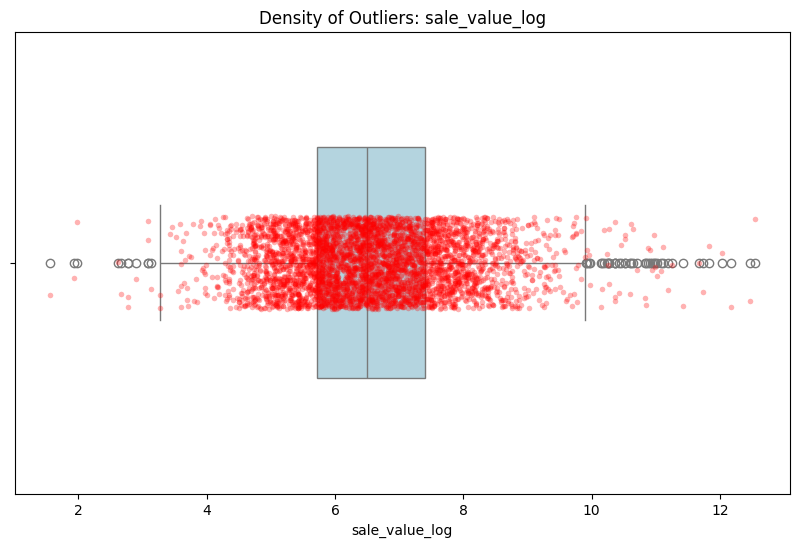

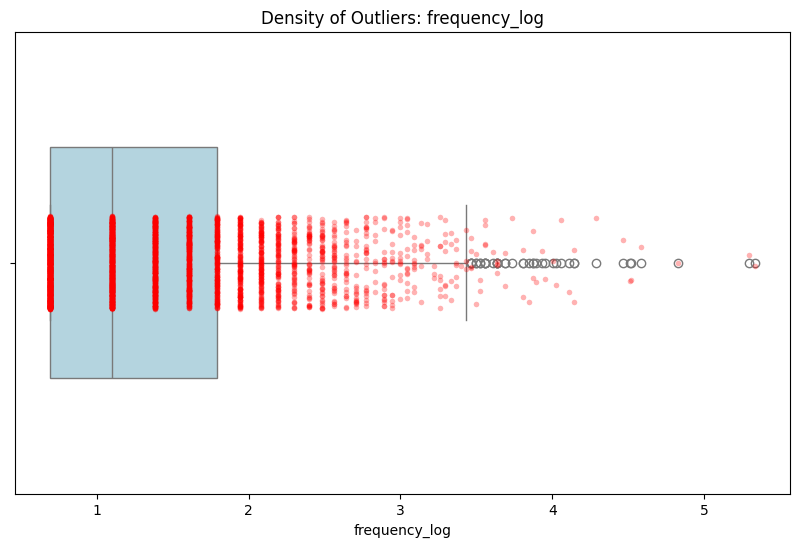

In [51]:
plot_outlier_density(df_test_log, 'sale_value_log')
plot_outlier_density(df_test_log, 'frequency_log')


### 3D scatter plot pre-KMeans overview

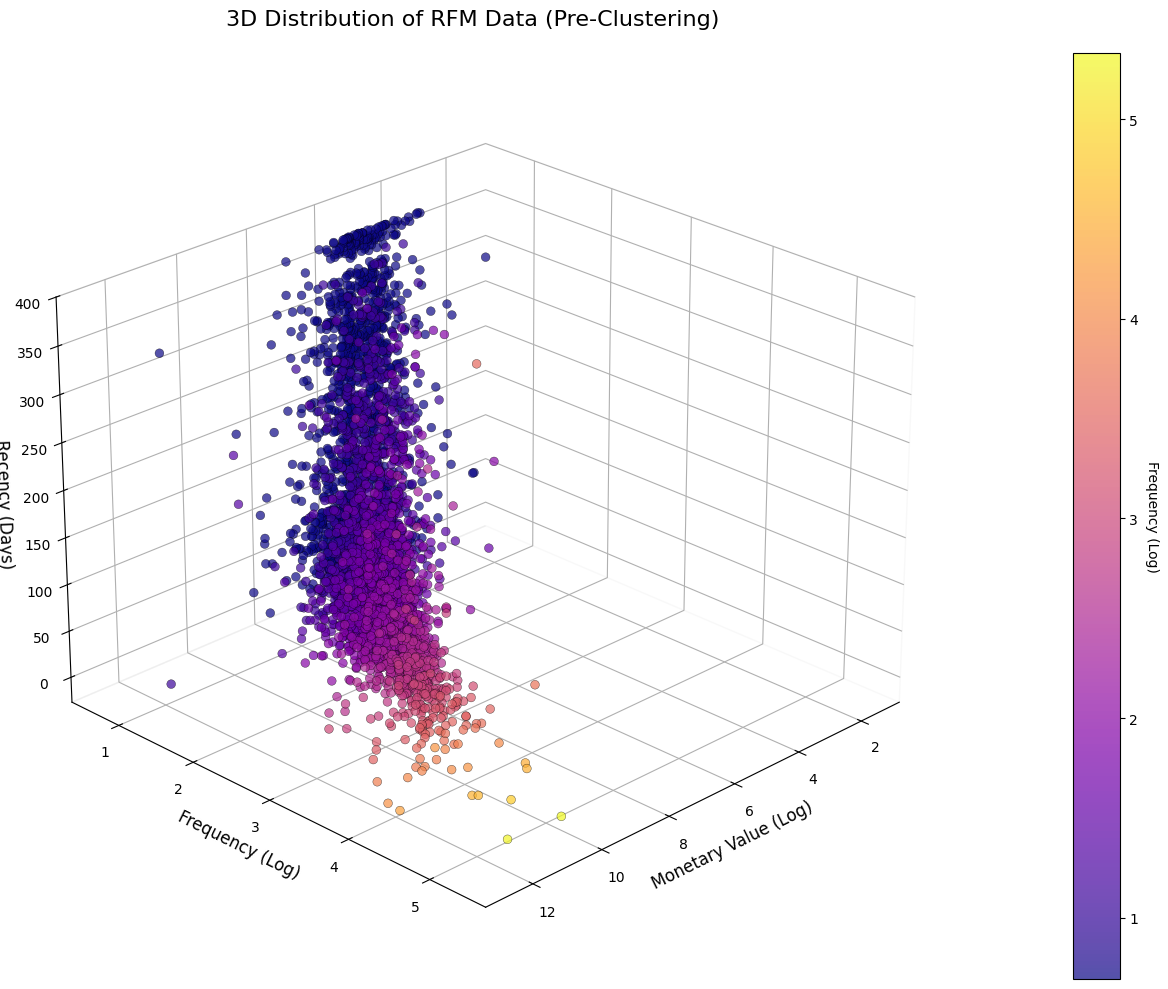

In [52]:
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Using a gradient based on Frequency helps visualize density/depth
scatter = ax.scatter(
df_test_log['sale_value_log'],
df_test_log['frequency_log'],
df_test_log['recency_days'],
c=df_test_log['frequency_log'], # Color by Frequency to see depth
cmap='plasma', # 'plasma' or 'viridis' works well for data
s=40, # Point size
alpha=0.7, # Transparency to see overlapping points
edgecolors='k', # Black edges for better definition
linewidth=0.3
)

# Shows the scale for the frequency coloring
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Frequency (Log)', rotation=270, labelpad=15)

ax.set_xlabel('Monetary Value (Log)', fontsize=12)
ax.set_ylabel('Frequency (Log)', fontsize=12)
ax.set_zlabel('Recency (Days)', fontsize=12)
ax.set_title('3D Distribution of RFM Data (Pre-Clustering)', fontsize=16, pad=20)

# Rotating the plot helps see if data is separated
ax.view_init(elev=25, azim=45)

ax.grid(True, linestyle='--', alpha=0.4)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

plt.tight_layout()
plt.show()


## Scaling for KMeans

Standard Scaling is the best approach for K-Means because the algorithm relies entirely on Euclidean distance to form clusters. K-Means naturally assumes features are measured on the same scale; without standardization, variables with larger magnitudes will mathematically dominate the distance calculation.

Data roughly follows a normal distribution (Gaussian). This is the best practice for K-Means.

In [53]:
df_test_log = set_column_as_index(df_test_log, 'customer_id') # Implement withou re ordering


In [54]:
# List of logarithmic transformed features
cols_to_scale = ['sale_value_log', 'frequency_log', 'recency_days']

df_scaled, scaler = apply_standard_scaling(df_test_log, cols_to_scale)

# print(df_scaled.head())


## K-Means implementation

In [56]:
from src.k_means_function import *
import joblib


In [57]:
df_cluster, kmeans_model = apply_kmeans(df_scaled) # Defatul n of clusters = 3, default random_state = 123, returns a df

# Save model
joblib.dump(kmeans_model, 'kmeans_model.pkl')


Model fitted.


['kmeans_model.pkl']

In [58]:
print(df_cluster)
print(f"Intertia:{kmeans_model.inertia_}") # For Elbow method


       sale_value_log  frequency_log  recency_days  cluster
12346        3.728238      -0.951280      2.329115        1
12347        1.429174       1.082291     -0.905532        1
12348        0.554384       0.392837     -0.176738        1
12349        0.565558      -0.951280     -0.735813        2
12350       -0.706976      -0.951280      2.169379        0
...               ...            ...           ...      ...
18280       -1.094684      -0.951280      1.849908        0
18281       -1.730036      -0.951280      0.881511        0
18282       -1.105954      -0.356499     -0.845631        2
18283        0.833148       2.188008     -0.885565        1
18287        0.749950       0.065505     -0.496209        1

[4334 rows x 4 columns]
Intertia:4301.737703153692


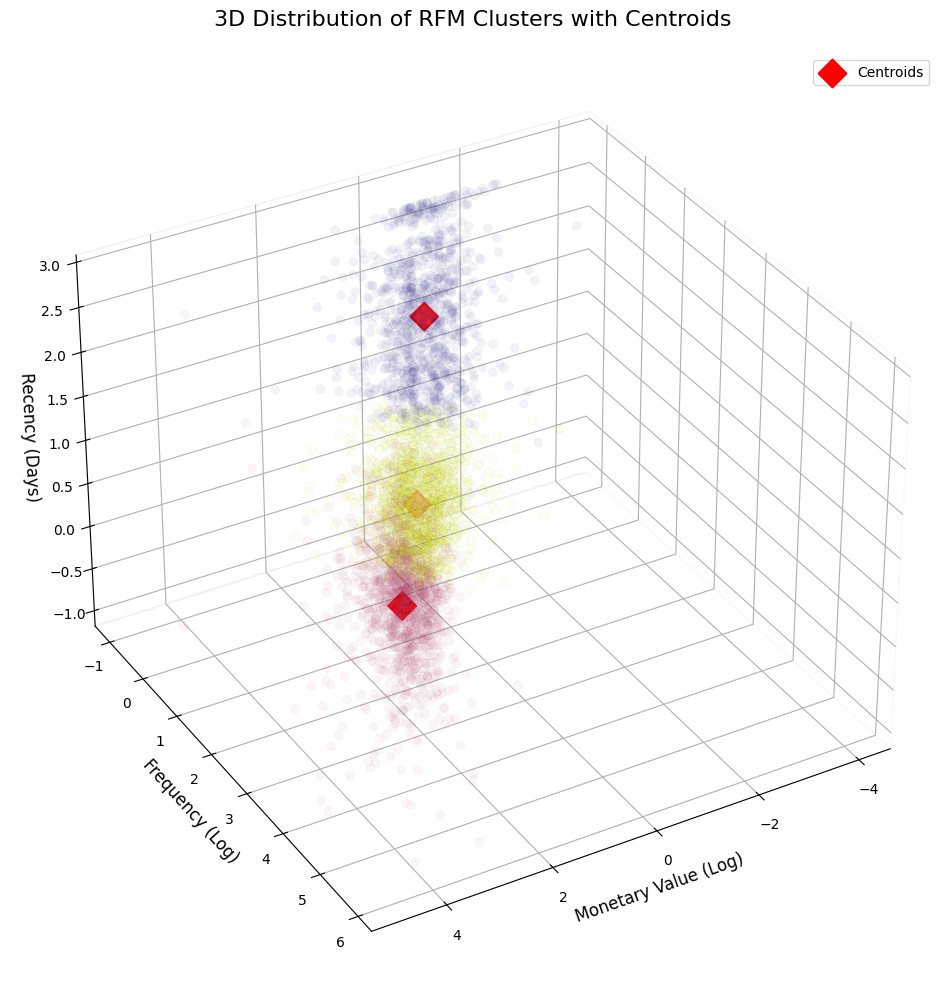

In [59]:
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df_cluster['sale_value_log'],
    df_cluster['frequency_log'],
    df_cluster['recency_days'],
    c=df_cluster['cluster'],       # Color by Cluster assignment
    cmap='plasma',                  
    s=40,                           # Point size
    alpha=0.05,                      # Transparency (lowered slightly)
    edgecolors='k',                 
    linewidth=0.3
)

# Centroids
# model.cluster_centers_ contains the coordinates (x, y, z) for each cluster
# Respective axes: [Monetary, Frequency, Recency]
centroids = kmeans_model.cluster_centers_

ax.scatter(
    centroids[:, 0], # Monetary column
    centroids[:, 1], # Frequency column
    centroids[:, 2], # Recency column
    s=200,           # Very large size
    c='red',         # Distinct color
    marker='D',      # Star shape
    label='Centroids',
    edgecolors='red',
    linewidth=1.5,
    zorder =10
)

# cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
# cbar.set_label('Cluster', rotation=270, labelpad=15)
ax.legend(loc='upper right') # Show legend for the centroids

ax.set_xlabel('Monetary Value (Log)', fontsize=12)
ax.set_ylabel('Frequency (Log)', fontsize=12)
ax.set_zlabel('Recency (Days)', fontsize=12)
ax.set_title('3D Distribution of RFM Clusters with Centroids', fontsize=16, pad=20)

ax.view_init(elev=33, azim=60)

ax.grid(True, linestyle='--', alpha=.1)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

plt.tight_layout()
plt.show()
